In [1]:
from src.tensor import Tensor
import src.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST
np.set_printoptions(suppress=True)

In [2]:
mndata = MNIST('./mnist_dataset/')
mndata.gz = True
mnist_x_train, mnist_y_train = mndata.load_training()
mnist_x_test, mnist_y_test = mndata.load_testing()
x_train = Tensor(list(mnist_x_train))
x_test = Tensor(list(mnist_x_test))
y_train = Tensor(list(mnist_y_train))
y_test = Tensor(list(mnist_y_test))

In [3]:
rng = np.random.default_rng(seed=1)

# Scale down pixels from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# OneHot label vectors
def onehot(vector):
    tmp = []
    for scalar in vector.data:
        tmp2 = [1 if i==scalar else 0 for i in range(10)]
        tmp.append(tmp2)
    return Tensor(tmp)
y_train = onehot(y_train)
y_test = onehot(y_test)

print(f'x_train={x_train.shape}, y_train={y_train.shape}')
print(f'x_test={x_test.shape}, y_test={y_test.shape}')

x_train=(60000, 784), y_train=(60000, 10)
x_test=(10000, 784), y_test=(10000, 10)


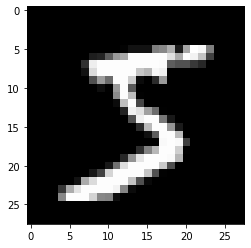

In [4]:
# Visualize X
img = np.array(x_train[0].tolist())
plt.imshow(img.reshape(28, 28),cmap='gray')
plt.show()

In [5]:
# Multinomial sampling with replacement
def draw_batch(batch_size): 
    draw = lambda: int(rng.random() * x_train.shape[0])
    batch = [draw() for _ in range(batch_size)]
    return x_train[batch], y_train[batch]

mlp = nn.MLP((
    nn.Linear(784, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 10, bias=False),
    nn.Softmax()
))
losses = []

std=9.598154952442092
std=21.55630229615948
std=14.802795775090653
Epoch 0: 20.338740158985715
Epoch 1: 19.21460996850951
Epoch 2: 20.53331758205468
Epoch 3: 17.60333631539521
Epoch 4: 17.696871309130174
Epoch 5: 21.892437309477867
Epoch 6: 18.88225884000495
Epoch 7: 19.012630572456167
Epoch 8: 16.766683589286394
Epoch 9: 17.17503215716352
Epoch 10: 15.146062734096292
Epoch 11: 14.767604929224872
Epoch 12: 12.826495541147574
Epoch 13: 12.875519011923814
Epoch 14: 18.10814756845869
Epoch 15: 10.825927434395563
Epoch 16: 11.73111811773739
Epoch 17: 12.399548579191789
Epoch 18: 13.183970106585836
Epoch 19: 11.541283698693167
Epoch 20: 12.887014576532584
Epoch 21: 9.663749767847602
Epoch 22: 8.573141426867185
Epoch 23: 9.355668410645833
Epoch 24: 10.759781421153953
Epoch 25: 9.89177918029521
Epoch 26: 11.521535276765745
Epoch 27: 9.472820622260045
Epoch 28: 9.839299519914661
Epoch 29: 10.406140315814845
Epoch 30: 8.195405277638473
Epoch 31: 8.367413373508558
Epoch 32: 7.901121701826488
Epo

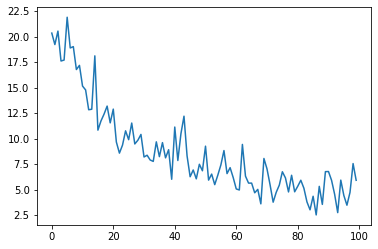

In [6]:
epochs = 100
batch_size = 32
lr = 0.1
breakpoint = -1
for e in range(epochs):
    x, y = draw_batch(batch_size)
    out = mlp(x, breakpoint=breakpoint, printstddev=(e==0))

    loss = nn.nlll(out, y, reduction='mean')
    loss.backward()
    mlp.optimize(lr=lr)
    mlp.zero_grad()

    losses.append(loss.data.item())
    print(f'Epoch {e}: {loss.data.item()}')

plt.plot(losses)
plt.show()

In [7]:
mlp.layers[0].bias

tensor([ 0.04128797, -0.15167559,  0.14818085, -0.0136215 ,  0.1251634 ,
        0.14467503, -0.07792528, -0.20101752, -0.14374679,  0.0331366 ,
        0.05398232,  0.14140907, -0.04756591, -0.00399738, -0.09362741,
        0.07743337,  0.00229172, -0.06021012, -0.03078676, -0.10961989,
        0.12214422, -0.06352059,  0.05529836, -0.15925548,  0.07874325,
        0.11755414, -0.05377889, -0.02152543, -0.01164369,  0.11641599,
       -0.10185886,  0.02874904,  0.0663776 , -0.07397892,  0.05667403,
        0.00301777,  0.05486473, -0.04200142, -0.01519275, -0.06110945,
        0.21362459, -0.15621992, -0.07740019,  0.07352853,  0.04774842,
        0.07791233, -0.04797322,  0.1822433 ,  0.0790745 ,  0.11066157,
       -0.03304722,  0.08170075,  0.05147787,  0.08513457,  0.13204709,
       -0.15070362, -0.07762179, -0.02978607,  0.07388927,  0.00504716,
        0.1266358 , -0.01758241,  0.11128143, -0.14404781, -0.00812092,
        0.16661308,  0.10465788, -0.04054636,  0.02101246, -0.0

In [11]:
correct = 0
for i in range(len(x_test.data)):
    y = y_test[i]
    x = mlp(x_test[i])
    corr = np.argmax(y.data)
    predicted = np.argmax(x.data)
    if predicted == corr: correct += 1

print(f'Test accuracy: {(correct/len(x_test.data))*100}%')

Test accuracy: 38.58%
